In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')

n_public_information_patterns = 128
q_list = np.logspace(1, 3, 40).astype(np.int32)
mg_list = np.logspace(1, 3, 40).astype(np.int32)

In [21]:
# mg = 0
# s = 2
# for q in q_list:
#     file_path = f'../results/q{q:04d}mg{mg:04d}s{s}.csv'
#     df = pd.read_csv(file_path)

#     print(np.mean(df.groupby('public_information').mean()**2) / q)

In [20]:
float(np.mean(df.groupby('public_information').mean()**2) / q)

0.01778744012170771

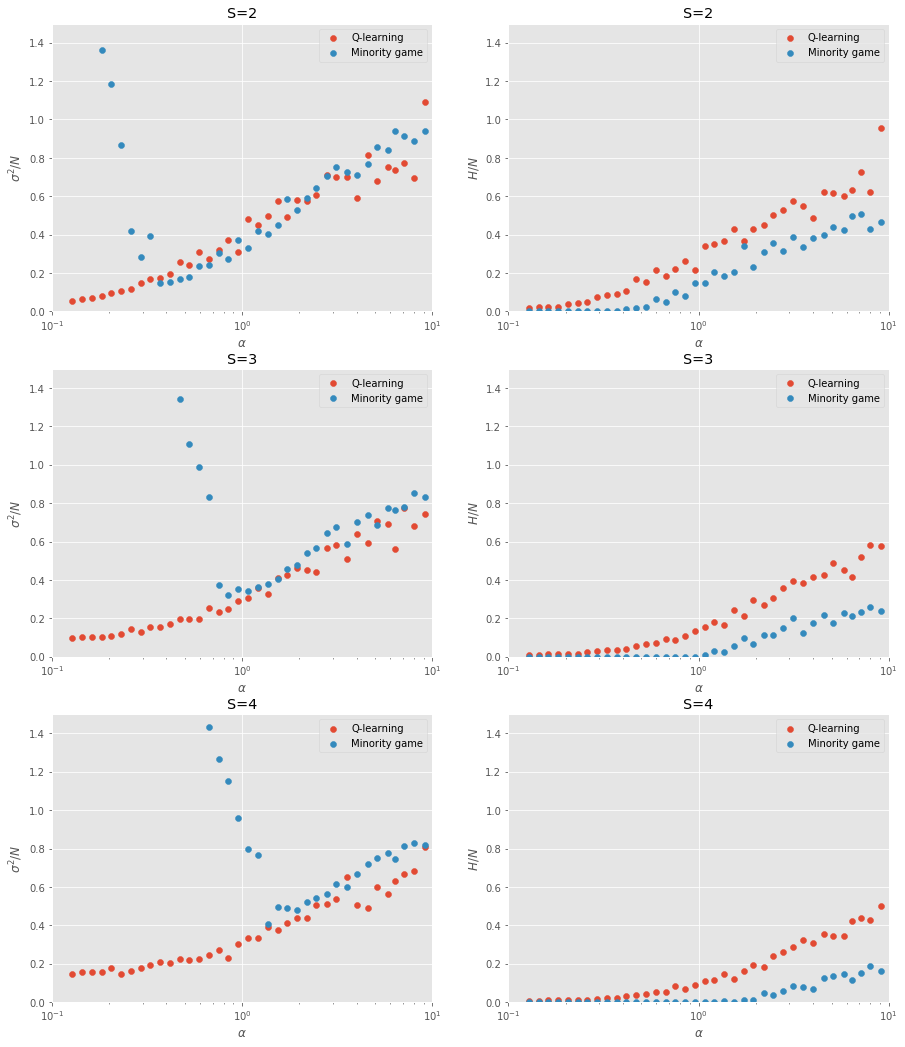

In [23]:
fig = plt.figure(figsize=(15, 18))

for i, s in enumerate([2, 3, 4]):
    # sigma^2 / N =====
    ax = fig.add_subplot(3, 2, 2 * i + 1)

    # Q-learning agents
    xs, ys = [], []
    mg = 0
    for q in q_list:
        file_path = f'../results/q{q:04d}mg{mg:04d}s{s}.csv'
        df = pd.read_csv(file_path)

        sigma = np.sqrt(np.mean(df.excess_demand**2))

        xs.append(n_public_information_patterns / q)
        ys.append(sigma**2 / q)
    
    ax.scatter(xs, ys, label='Q-learning')

    # Minority game agents
    xs, ys = [], []
    q = 0
    for mg in mg_list:
        file_path = f'../results/q{q:04d}mg{mg:04d}s{s}.csv'
        df = pd.read_csv(file_path)

        sigma = np.sqrt(np.mean(df.excess_demand**2))

        xs.append(n_public_information_patterns / mg)
        ys.append(sigma**2 / mg)
    
    ax.scatter(xs, ys, label='Minority game')

    ax.set_title(f'S={s}')
    ax.legend()
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$\sigma^2 / N$')
    ax.set_xscale('log')
    ax.set_xlim(0.1, 10)
    ax.set_ylim(0.0, 1.5)
    ax.set_xticks([0.1, 1.0, 10.0])

    # H / N =====
    ax = fig.add_subplot(3, 2, 2 * i + 2)

    # Q-learning agents
    xs, ys = [], []
    mg = 0
    for q in q_list:
        file_path = f'../results/q{q:04d}mg{mg:04d}s{s}.csv'
        df = pd.read_csv(file_path)

        h = float(np.mean(df.groupby('public_information').mean()**2))

        xs.append(n_public_information_patterns / q)
        ys.append(h / q)
    
    ax.scatter(xs, ys, label='Q-learning')

    # Minority game agents
    xs, ys = [], []
    q = 0
    for mg in mg_list:
        file_path = f'../results/q{q:04d}mg{mg:04d}s{s}.csv'
        df = pd.read_csv(file_path)

        h = float(np.mean(df.groupby('public_information').mean()**2))

        xs.append(n_public_information_patterns / mg)
        ys.append(h / mg)
    
    ax.scatter(xs, ys, label='Minority game')

    ax.set_title(f'S={s}')
    ax.legend()

    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel(r'$H / N$')

    ax.set_xscale('log')
    
    ax.set_xlim(0.1, 1.0)
    ax.set_ylim(0.0, 1.5)

    ax.set_xticks([0.1, 1.0, 10])

plt.legend()

plt.savefig('../figures/result.png')

plt.show()